In [20]:
#HF Example

import torch
from transformers import pipeline

pipe = pipeline(
    task="image-classification",
    model="facebook/dinov2-small-imagenet1k-1-layer",
    dtype=torch.float16,
    device="cuda"
)

pipe("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg")

Device set to use cuda


[{'label': 'tiger, Panthera tigris', 'score': 0.24335609376430511},
 {'label': 'tiger cat', 'score': 0.24146227538585663},
 {'label': 'lynx, catamount', 'score': 0.16084855794906616},
 {'label': 'marmot', 'score': 0.043973542749881744},
 {'label': 'tabby, tabby cat', 'score': 0.03293466567993164}]

In [21]:


from transformers import AutoImageProcessor, AutoModel
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

processor = AutoImageProcessor.from_pretrained('facebook/dinov2-base')
model = AutoModel.from_pretrained('facebook/dinov2-base')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
last_hidden_states = outputs.last_hidden_state
cls_embedding = last_hidden_states[:, 0, :]



In [22]:
print(cls_embedding.size())

torch.Size([1, 768])


In [23]:
import hdf5
file=hdf5.open_HDF5("downloaded_embeddings.h5")
vectors=file["vectors"]
vectors=vectors[:] #load into a np array
labels=file["coordinates"]
labels=labels[:]
print(vectors)
print(labels)
file.close()

[[ 0.95240444  1.3240675   0.28314427 ... -0.40695077 -0.12938523
   0.65251255]
 [ 0.73756576  1.2255933   0.01971832 ... -2.2677386   0.3768237
   1.4319218 ]
 [ 0.8730782   1.568318    0.21059269 ...  1.7526027  -1.3327127
   1.7590166 ]
 ...
 [ 2.8841746  -2.7090735  -1.8563217  ...  3.5333478  -1.8200037
  -1.7979321 ]
 [ 0.7231116  -0.3009514  -2.2173426  ... -2.9620824   1.0859857
   0.02212841]
 [ 0.88997984  0.62839216 -1.7182935  ... -2.0426896   2.6787934
   1.5962486 ]]
[[38.01888  -7.86417 ]
 [42.89792  -5.537902]
 [43.729904  3.313452]
 ...
 [47.63359  12.09996 ]
 [48.365     6.681111]
 [50.73414   9.120029]]


DINO encoder: 
Mean: tensor(0.1963, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.0707, device='cuda:0', grad_fn=<DivBackward0>)
Std: tensor(0.0655, device='cuda:0', grad_fn=<SqrtBackward0>) tensor(0.0752, device='cuda:0', grad_fn=<SqrtBackward0>)

Bioclip (simple architechture):
Mean: tensor(0.3107, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.0632, device='cuda:0', grad_fn=<DivBackward0>)
Std: tensor(0.0844, device='cuda:0', grad_fn=<SqrtBackward0>) tensor(0.1299, device='cuda:0', grad_fn=<SqrtBackward0>)

In [26]:
#Number of occurences in Switwerland

import pandas as pd

# Replace 'data.tsv' with the path to your file
file_path = '/home/adam/source/CLIP/data_plantnet_obsevations/occurrence.txt'

# Load the TSV file
df = pd.read_csv(file_path, sep='\t', low_memory=False)

# Check the column names for country info
print(df.columns)

# Filter rows where the country is Switzerland
switzerland_data = df[df['countryCode'] == 'CH']

# Count the number of rows
num_datapoints = len(switzerland_data)

print(f"Number of datapoints in Switzerland: {num_datapoints}")

# Filter rows where the country is Switzerland
france_data = df[df['countryCode'] == 'FR']

# Count the number of rows
num_datapoints = len(france_data)

print(f"Number of datapoints in France: {num_datapoints}")


Index(['gbifID', 'accessRights', 'bibliographicCitation', 'language',
       'license', 'modified', 'publisher', 'references', 'rightsHolder',
       'type',
       ...
       'publishedByGbifRegion', 'level0Gid', 'level0Name', 'level1Gid',
       'level1Name', 'level2Gid', 'level2Name', 'level3Gid', 'level3Name',
       'iucnRedListCategory'],
      dtype='object', length=226)
Number of datapoints in Switzerland: 74963
Number of datapoints in France: 884128


densité de points en suisse: 
74963/41 285 km2=1.81

France: 884128/632 702 km2=1.39
We good

In [27]:
# Replace 'data.tsv' with the path to your file
file_path =  '/home/adam/source/CLIP/data_plantnet_obsevations/occurrence.txt'

# Load the TSV file
df = pd.read_csv(file_path, sep='\t', low_memory=False)

# Count datapoints per country
country_counts = df['countryCode'].value_counts()

# Display results
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Avoid line wrapping
pd.set_option('display.max_colwidth', None)  # Full column width
print(country_counts)


countryCode
FR    884128
ES    253748
DE    237009
IT    199536
GB    132793
US    125428
NL    104618
CH     74963
CZ     61113
BE     59173
AT     44565
PL     36438
CA     29717
PT     28453
RU     22644
HU     21479
SK     16528
BR     15615
GR     14699
KE     14308
SE     13236
HR     11800
TR     11083
IN     11004
IE      9793
DK      9445
NO      9042
UA      8886
RO      8085
FI      8053
SI      7181
RE      6587
AR      6290
AU      4955
BG      4680
CL      3733
MX      3678
RS      3487
CR      3089
MA      3013
DZ      2681
CO      2623
GP      2530
LU      2396
ZA      2232
EE      2055
MQ      1981
BA      1895
ID      1850
JP      1669
IL      1645
IR      1634
BY      1602
ME      1554
LV      1549
LT      1506
NC      1490
IS      1312
TH      1302
MG      1248
CG      1143
NZ      1088
CY      1075
GE       996
MT       969
DO       946
AL       825
PE       783
GF       741
UY       719
MY       712
VN       676
AD       672
CN       668
TN       656
EC       651


Section dedicated to get the proper data and fit linear model from both covariates and embeddings, to compare.

(10013, 30)
(10013, 30) (10013, 30)
AUC cov PR: 0.8060599803800079
AUC emb PR: 0.7355840243577403
AUC cov MLP: 0.8425111929337424
AUC emb MLP: 0.7907197135528283
(50 first components of PCA for embeddings, with layers 50-64-32-1)

### Evaluation

In [4]:
import SDM_eval
import nn_classes
import torch
import importlib
import torch.nn as nn
importlib.reload(SDM_eval)
importlib.reload(nn_classes)

import sys
sys.path.append("/home/adam/source/geo-clip/geoclip/")
from model import GeoCLIP
from geoclip import LocationEncoder

device="cuda"
data_path="bioCLIP_species_embeddings.h5"
fourier_dim=64
covariate_dim=13
hidden_dim=256
dim_emb=512


pos_enc = LocationEncoder(from_pretrained=False).to("cuda")

model = nn_classes.DoubleNetwork_V2(pos_enc, dim_hidden=768, dim_output=dim_emb).to(device)

state_dict = torch.load("Model_saves/downloaded_specie_embedding_VS_coords/model.pt")
model.load_state_dict(state_dict)
pos_enc=model.pos_encoder


/tmp/ipykernel_3436842/4143374168.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("Model_saves/downloaded_specie_embedding_VS_coords/model.pt")


In [9]:
dim_emb=512
data_path="embeddings_data_and_dictionaries/Embeddings/swiss_bioclip_embeddings/swiss_data_bioclip.h5"
pos_encoder =LocationEncoder(from_pretrained=False)
image_encoder=nn_classes.Fourier_MLP(original_dim=13, fourier_dim=104, hidden_dim=1024, output_dim=dim_emb)
model= nn_classes.DoubleNetwork(image_encoder=image_encoder,pos_encoder=pos_encoder).to(device)
state_dict = torch.load("Model_saves/NCEAS_VS_coords/model.pt")
model.load_state_dict(state_dict)
pos_enc=model.pos_encoder

/tmp/ipykernel_3436842/736301893.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("Model_saves/NCEAS_VS_coords/model.pt")


/home/adam/anaconda3/envs/geoclip/lib/python3.12/site-packages/geoclip/model/location_encoder.py:57: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch

(25719, 2)
sims shape: torch.Size([1, 25719])
France


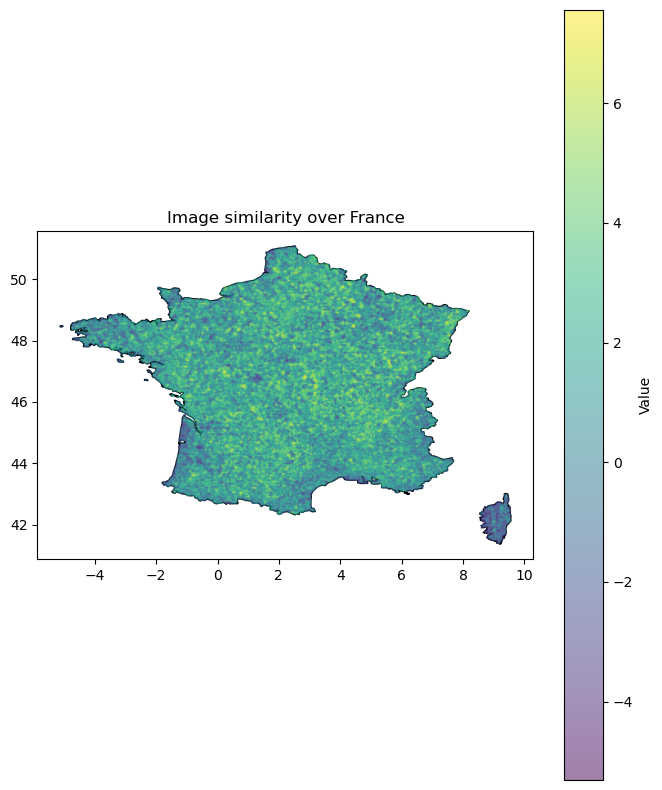

In [7]:
import utils
import importlib
from geoclip import LocationEncoder
import open_clip
import torch
import nn_classes
importlib.reload(nn_classes)
importlib.reload(utils)


data_path="embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/difference_embeddings.h5"
emb_vector, coord, idx = utils.get_example(data_path, 8)
emb_vector=emb_vector.to("cuda").unsqueeze(dim=0) #careful with hdf5 opening


dim_emb=512
pos_encoder =LocationEncoder(from_pretrained=True)
model= nn_classes.DoubleNetwork_V2(pos_encoder=pos_encoder, dim_hidden=768, dim_output=dim_emb).to("cuda")
state_dict = torch.load("Model_saves/difference_embeddings/model.pt")
model.load_state_dict(state_dict)

utils.map_embedding(model, emb_vector, country="France", device="cuda", grid_resolution=0.05, save_path=None)
pos_enc=model.pos_encoder

In [ ]:
import utils
import importlib
from geoclip import LocationEncoder
import open_clip
import torch
import nn_classes
importlib.reload(nn_classes)
importlib.reload(utils)


data_path="embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioCLIP_full_dataset_embeddings.h5"
dim_emb=512
pos_encoder =LocationEncoder(from_pretrained=False)
model= nn_classes.DoubleNetwork_V2(pos_encoder=pos_encoder, dim_hidden=768, dim_output=dim_emb).to("cuda")
state_dict = torch.load("Model_saves_old/geoclip_pos_enc/model.pt")
model.load_state_dict(state_dict, strict=False)
#model.logit_scale = torch.nn.Parameter(torch.log(torch.tensor(1/0.07, device="cuda")))
pos_enc=model.pos_encoder

/tmp/ipykernel_36020/1604591180.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("Model_saves_old/geoclip_pos_enc/model.pt")


In [27]:
import utils
import importlib
importlib.reload(utils)
sims=utils.test_similarity(
        data_path, 
        model, 
        nbr_iter=7000,
        nbr_samples=2,
        device="cuda", 
        plot_sims=True,
        sort_duplicates=True, 
        dictionary_path="embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioclip_data_dictionary_all_taxons",
        #"/home/adam/source/CLIP/embeddings_data_and_dictionaries/Embeddings/swiss_bioclip_embeddings/data_dictionary_sciName",
        modalities=["images","coords"]
        )
print(sims)

Computing similarities: 100%|██████████| 7000/7000 [00:13<00:00, 510.53it/s]


(0.27964699268341064, 0.03412778675556183, 0.12913556396961212, 0.14502964913845062)


In [23]:
import SDM_eval
import importlib
importlib.reload(SDM_eval)

covs=["ccc","ddeg","tavecc"]
covs=["tavecc"]
#Train models on PO data for evaluation
PR_emb, PR_cov, PR_both, MLP_emb, MLP_cov, MLP_both, scaler_cov, scaler_emb, pca = SDM_eval.train_models(
    pos_encoder=pos_enc,
    do_pca=False,
    n_pca_components=None,
    hidden_size=[256, 256],
    epochs=200,
    #covariates = covs,
    train_MLP=True,
    data_callback=SDM_eval.get_data_geoplant
)



getting embeddings
shape Xemb (19035, 512)
shape Xcov (19035, 64)
shape y (19035, 62)
fitting models


100%|██████████| 200/200 [00:18<00:00, 10.78it/s]


In [24]:
#Evaluate on PA data
import numpy as np
importlib.reload(SDM_eval)
SDM_eval.evaluate_models(
    pos_enc, 
    scaler_cov, 
    scaler_emb, 
    PR_cov, #from fit_multi_GLM
    PR_emb, #from fit_multi_GLM
    PR_both, #from fit_multi_GLM
    MLP_cov, #from train_one_MLP : shape (n_samples, n_species)
    MLP_emb,  #from train_one_MLP
    MLP_both,
    pca_model=pca, #to lower dim of X_test_emb.
    #covariates = covs,
    train_MLP=True,
    data_callback=SDM_eval.get_data_geoplant
    ) 




(9948, 62) (9948, 62)
AUC cov PR: 0.735836650355836
AUC emb PR: 0.6538462035370004
AUC both PR: 0.7023996175984064
AUC cov MLP: 0.7549132396785859
AUC emb MLP: 0.6726977893356888
AUC both MLP: 0.7320435142504009


{'auc_cov_PR': 0.735836650355836,
 'auc_emb_PR': 0.6538462035370004,
 'auc_cov_MLP': 0.7549132396785859,
 'auc_emb_MLP': 0.6726977893356888}

Test throwing encoding layers:
Kept case:
AUC cov PR: 0.8060599803800079
AUC emb PR: 0.7784794173292406
AUC both PR: 0.7900260684450104
AUC cov MLP: 0.8417426332934873
AUC emb MLP: 0.7869176650659143
AUC both MLP: 0.8205874439001413
Thrown away case:
AUC cov PR: 0.8060599803800079
AUC emb PR: 0.778927852042484
AUC both PR: 0.7932689858268791
AUC cov MLP: 0.8448998596273812
AUC emb MLP: 0.7848732041227866
AUC both MLP: 0.8152895763020634
--> No difference

Standard results (here from high_frequency_encoding run)
(10013, 30) (10013, 30)
AUC cov PR: 0.8060599803800079
AUC emb PR: 0.732598130855661
AUC cov MLP: 0.842159886705586
AUC emb MLP: 0.783553522732476

With trained geoclip geoembedder:
AUC cov PR: 0.8060599803800079
AUC emb PR: 0.778447887867525
AUC both PR: 0.7899498774724577

AUC cov MLP: 0.8433181693418867
AUC emb MLP: 0.7856988640697274
AUC both MLP: 0.8276918843283869

Untrained geoclip encoder: 
AUC cov PR: 0.8060599803800079
AUC emb PR: 0.7683688256327119
AUC both PR: 0.7855364944610909
AUC cov MLP: 0.8432499617429687
AUC emb MLP: 0.784508469674563
AUC both MLP: 0.8181686826506902


In [ ]:
import SDM_eval
import importlib
importlib.reload(SDM_eval)
SDM_eval.SDM_eval_from_folder("/home/adam/source/CLIP/Model_saves/run_failed_relaunch",output_file="run_failed_relaunch_emb", PR_to_train=["emb"])

/home/adam/source/CLIP/SDM_eval.py:457: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location='cuda')


getting embeddings
shape Xemb (26849, 512)
shape Xcov (26849, 64)
shape y (26849, 84)
fitting models


100%|██████████| 200/200 [00:52<00:00,  3.84it/s]


AUC cov PR: 0.7311174764412842
AUC emb PR: 0.7633191506531273
AUC emb MLP: 0.7133815494695878
Saved output to run_failed_relaunch_emb


AUC cov PR: 0.8060599803800079
AUC emb PR: 0.7400231664126325
AUC both PR: 0.7607376535780783
AUC cov MLP: 0.842312241430506
AUC emb MLP: 0.8370319980970625
AUC both MLP: 0.8417085496388508 
Got these results for a degenerate model (swiss without covariate, chpkt no 4) that predicts 0 for everything...

Random covariates:
AUC cov PR: 0.8060599803800079
AUC emb PR: 0.6875508546547481
AUC both PR: 0.7455622719594684
AUC cov MLP: 0.841604776521342
AUC emb MLP: 0.7172097023371387
AUC both MLP: 0.8199447520749399

In [28]:
import utils
import importlib
import pandas as pd
importlib.reload(utils)
dictionary=pd.read_csv("embeddings_data_and_dictionaries/Embeddings/swiss_bioclip_embeddings/data_dictionary_sciName")#############Swiss?
print(data_path)
utils.do_and_plot_PCA(model, data_path,pca_file_name="corrected_frequencies", dictionary=dictionary,sort_duplicates=True,save_path_pic=None)

embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioCLIP_full_dataset_embeddings.h5


KeyboardInterrupt: 

tensor([[47.4069,  8.4055],
        [46.3548,  7.1194],
        [46.9027,  8.1541],
        [47.3919,  7.1398],
        [46.8593,  8.0853],
        [46.3546,  9.5800],
        [47.2842,  7.7050],
        [46.5536,  6.1986],
        [46.5293,  9.8565],
        [46.7865,  8.3466]], device='cuda:0')
tensor([[ 2.5500e+02,  2.5500e+02,  2.5500e+02,  6.5535e+04, -3.4000e+38,
          2.5500e+02,  6.5535e+04,  2.5500e+02,  6.5535e+04,  6.5535e+04,
         -3.2768e+04, -3.2768e+04, -3.2768e+04],
        [ 2.5500e+02,  2.5500e+02,  2.5500e+02,  6.5535e+04, -3.4000e+38,
          2.5500e+02,  6.5535e+04,  2.5500e+02,  6.5535e+04,  6.5535e+04,
         -3.2768e+04, -3.2768e+04, -3.2768e+04],
        [ 2.5500e+02,  2.5500e+02,  2.5500e+02,  6.5535e+04, -3.4000e+38,
          2.5500e+02,  6.5535e+04,  2.5500e+02,  6.5535e+04,  6.5535e+04,
         -3.2768e+04, -3.2768e+04, -3.2768e+04],
        [ 2.5500e+02,  2.5500e+02,  2.5500e+02,  6.5535e+04, -3.4000e+38,
          2.5500e+02,  6.5535e+04,  2.5500e+02,  6.5535e+04,  6.5535e+04,
         -3.2768e+04, -3.2768e+04, -3.2768e+04],
        [ 2.5500e+02,  2.5500e+02,  2.5500e+02,  6.5535e+04, -3.4000e+38,
          2.5500e+02,  6.5535e+04,  2.5500e+02,  6.5535e+04,  6.5535e+04,
         -3.2768e+04, -3.2768e+04, -3.2768e+04],
        [ 2.5500e+02,  2.5500e+02,  2.5500e+02,  6.5535e+04, -3.4000e+38,
          2.5500e+02,  6.5535e+04,  2.5500e+02,  6.5535e+04,  6.5535e+04,
         -3.2768e+04, -3.2768e+04, -3.2768e+04],
        [ 2.5500e+02,  2.5500e+02,  2.5500e+02,  6.5535e+04, -3.4000e+38,
          2.5500e+02,  6.5535e+04,  2.5500e+02,  6.5535e+04,  6.5535e+04,
         -3.2768e+04, -3.2768e+04, -3.2768e+04],
        [ 2.5500e+02,  2.5500e+02,  2.5500e+02,  6.5535e+04, -3.4000e+38,
          2.5500e+02,  6.5535e+04,  2.5500e+02,  6.5535e+04,  6.5535e+04,
         -3.2768e+04, -3.2768e+04, -3.2768e+04],
        [ 2.5500e+02,  2.5500e+02,  2.5500e+02,  6.5535e+04, -3.4000e+38,
          2.5500e+02,  6.5535e+04,  2.5500e+02,  6.5535e+04,  6.5535e+04,
         -3.2768e+04, -3.2768e+04, -3.2768e+04],
        [ 2.5500e+02,  2.5500e+02,  2.5500e+02,  6.5535e+04, -3.4000e+38,
          2.5500e+02,  6.5535e+04,  2.5500e+02,  6.5535e+04,  6.5535e+04,
         -3.2768e+04, -3.2768e+04, -3.2768e+04]]

In [ ]:
import utils
import importlib
import numpy as np
importlib.reload(utils)
coords=np.array([[47.4069,  8.4055], [46.3548,  7.1194]])

lon=coords[:,1]
lat=coords[:,0]

covariates_dict=utils.NCEAS_covariates(lon, lat)
keys=["bcc"]
keys = ["bcc","calc","ccc","ddeg","nutri","pday","precyy","sfroyy","slope","sradyy","swb","tavecc","topo"] #it is ugly code but it keeps the order, if needed
cov_np = np.stack([covariates_dict[k] for k in keys], axis=1)  # (batch, num_covariates)
covariates = torch.from_numpy(cov_np).float().to("cuda")
np.set_printoptions(threshold=1000)
print(covariates)

#[6671421.70631974 6644013.04762708] [-3007514.3210794  -3213124.82214146]

[1684605.06594542 1587054.97490143] [150799.05264788  33437.2390558 ]
tensor([[ 4.0000e+00,  0.0000e+00,  2.0000e+00,  3.3200e+03,  1.7000e+01,
          3.5000e+01,  9.9100e+02,  0.0000e+00,  5.0000e+00,  1.8448e+04,
         -1.9700e+02,  0.0000e+00, -9.0000e+00],
        [ 2.3000e+01,  1.0000e+00,  2.0000e+00,  2.1490e+03,  7.0000e+00,
          4.0000e+01,  1.5940e+03,  0.0000e+00,  3.2300e+02,  2.1439e+04,
          1.4000e+01, -2.0000e+00, -3.5000e+01]], device='cuda:0')


Failed to download https://bs.plantnet.org/image/o/21b326f1faf2216108193b5305bb05828ee4551d


In [6]:
from diffusers import AutoencoderKL
from PIL import Image
import torch
from torchvision import transforms
import numpy as np


device="cuda"
n=500
url = "https://huggingface.co/stabilityai/sd-vae-ft-mse-original/blob/main/vae-ft-mse-840000-ema-pruned.safetensors"  # can also be a local file
vae = AutoencoderKL.from_single_file(url).to(device)

# Load image
image = Image.open("1_5110233343.jpg").convert("RGB")
#0_2644790957.jpg
#1_5110233343.jpg

# Resize to 512x512
resized_image = image.resize((512, 512))

# Save the resized image
resized_image.save("resized.jpg")

# If you also want it as a tensor for PyTorch:
trans = transforms.ToTensor()  # Converts to tensor with values in [0,1]
image = trans(resized_image).unsqueeze(0).to(device)  # Add batch dimension

print(image.shape)

with torch.no_grad():
    print("Encoding")
    posterior = vae.encode(image)
    latents = posterior.latent_dist.mean   # or .sample()

    latents = latents / vae.config.scaling_factor
    latents= latents.repeat(n, 1, 1, 1)
    size= size_in_bytes = latents.numel() * latents.element_size()
    print(size)
    # Save to disk
    torch.save(latents, "tensor.pt")
    data=latents.cpu().numpy()
    print("data shape:",data.shape)
    np.save(r'D:\in.npy', data)
    create_HDF5_file(4,64,64,name="hdf_file",data_name="vectors",label_name="coordinates",label_size=2,label_type="float32")
    with h5py.File("hdf_file.h5", "a") as file:
        append_HDF5(data, np.array([0,1]), file, data_name="vectors", label_name="coordinates", dict_idx=None)
    
    

    # Load back
    y = torch.load("tensor.pt")


    print("Decoding. shape:", latents.shape)
    #recon = vae.decode(latents).sample
    #recon = (recon + 1) / 2
    #recon = recon.clamp(0, 1)


to_pil = transforms.ToPILImage()
image=image.squeeze(0).cpu()
img_pil = to_pil(image)

img_pil.save("output.jpg")





ModuleNotFoundError: No module named 'diffusers'

columns: Index(['Unnamed: 0', 'gbifID', 'identifier', 'decimalLatitude',
       'decimalLongitude', 'scientificName', 'countryCode'],
      dtype='object')
column species nan? True
country code nan? False
number of missing country codes: 174
number of unique species: 18942
counting
plotting


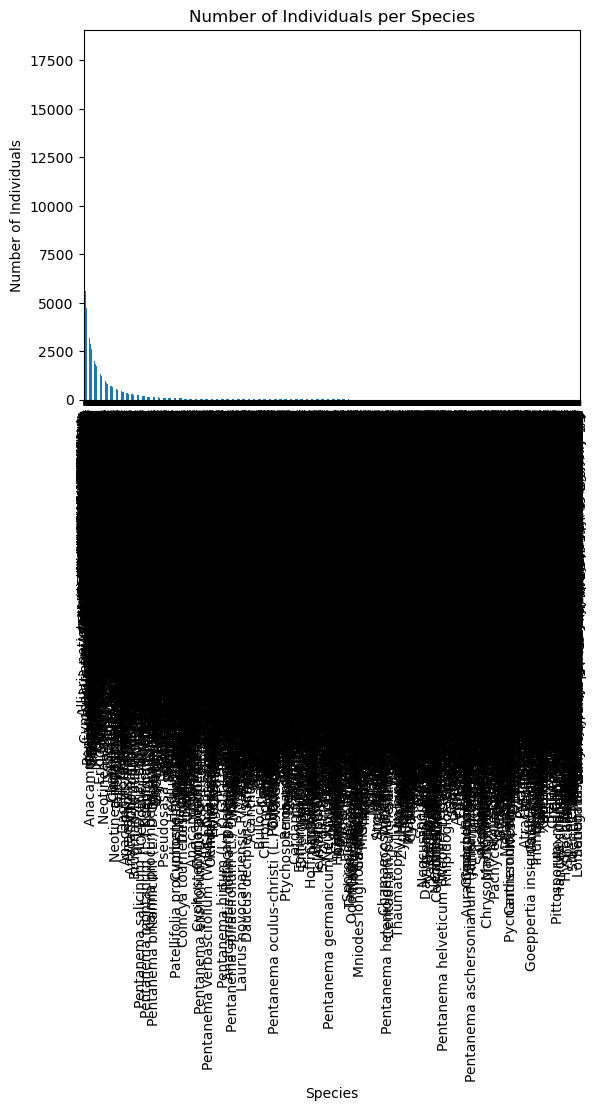

scientificName
Alliaria petiolata (M.Bieb.) Cavara & Grande                                                      18158
Chelidonium majus L.                                                                              16232
Cornus sanguinea L.                                                                               14773
Prunus spinosa L.                                                                                 12651
Glechoma hederacea L.                                                                             11309
Fagus sylvatica L.                                                                                10681
Symphytum officinale L.                                                                            9966
Prunella vulgaris L.                                                                               9630
Veronica chamaedrys L.                                                                             9580
Geranium robertianum L.                          

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

dictionary=pd.read_csv("embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioclip_data_dictionary_sciName_countrycode")
print("columns:",dictionary.columns)

print("column species nan?",dictionary["scientificName"].notna().all())
print("country code nan?",dictionary["countryCode"].notna().all())
print("number of missing country codes:", dictionary["countryCode"].isna().sum())

missing_indices = dictionary[dictionary["countryCode"].isna()].index

species = dictionary['scientificName']
print("number of unique species:",species.nunique()) #18942

# Count number of individuals per species, sorted decreasingly
print("counting")
species_counts = species.value_counts()


print("plotting")
# Plot as bar chart
species_counts.plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Number of Individuals')
plt.title('Number of Individuals per Species')
plt.show()

# Display results
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Avoid line wrapping
pd.set_option('display.max_colwidth', None)  # Full column width
print(species_counts)


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
species = dictionary['scientificName']
print("number of unique species:",species.nunique()) #18942

# Count number of individuals per species, sorted decreasingly
print("counting")
species_counts = species.value_counts()
# Calculate proportions
species_proportion = species_counts / species_counts.sum()

# Calculate cumulative proportion
cumulative_proportion = species_proportion.cumsum()

# Combine into a single DataFrame for display
species_summary = pd.DataFrame({
    'count': species_counts,
    'proportion': species_proportion,
    'cumulative_proportion': cumulative_proportion
})


# Display full summary
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(species_summary.to_string())


number of unique species: 18942
counting
                                                                                                count    proportion  cumulative_proportion
scientificName                                                                                                                            
Alliaria petiolata (M.Bieb.) Cavara & Grande                                                    18158  5.733384e-03               0.005733
Chelidonium majus L.                                                                            16232  5.125250e-03               0.010859
Cornus sanguinea L.                                                                             14773  4.664571e-03               0.015523
Prunus spinosa L.                                                                               12651  3.994550e-03               0.019518
Glechoma hederacea L.                                                                           11309  3.570814e-03          

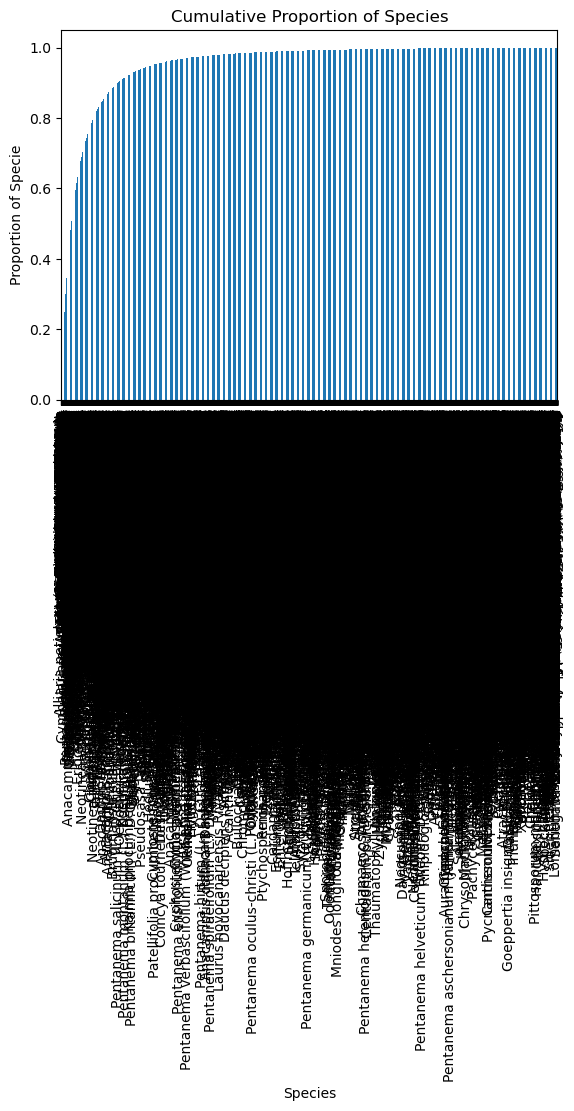

In [36]:
# Plot as bar chart
cumulative_proportion.plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Proportion of Specie')
plt.title('Cumulative Proportion of Species')
plt.show()

In [5]:
import utils
utils.print_model("Model_saves/geoclip_pos_enc/model.pt")


=== Keys in state_dict ===
pos_encoder.LocEnc0.capsule.0.b
pos_encoder.LocEnc0.capsule.1.weight
pos_encoder.LocEnc0.capsule.1.bias
pos_encoder.LocEnc0.capsule.3.weight
pos_encoder.LocEnc0.capsule.3.bias
pos_encoder.LocEnc0.capsule.5.weight
pos_encoder.LocEnc0.capsule.5.bias
pos_encoder.LocEnc0.head.0.weight
pos_encoder.LocEnc0.head.0.bias
pos_encoder.LocEnc1.capsule.0.b
pos_encoder.LocEnc1.capsule.1.weight
pos_encoder.LocEnc1.capsule.1.bias
pos_encoder.LocEnc1.capsule.3.weight
pos_encoder.LocEnc1.capsule.3.bias
pos_encoder.LocEnc1.capsule.5.weight
pos_encoder.LocEnc1.capsule.5.bias
pos_encoder.LocEnc1.head.0.weight
pos_encoder.LocEnc1.head.0.bias
pos_encoder.LocEnc2.capsule.0.b
pos_encoder.LocEnc2.capsule.1.weight
pos_encoder.LocEnc2.capsule.1.bias
pos_encoder.LocEnc2.capsule.3.weight
pos_encoder.LocEnc2.capsule.3.bias
pos_encoder.LocEnc2.capsule.5.weight
pos_encoder.LocEnc2.capsule.5.bias
pos_encoder.LocEnc2.head.0.weight
pos_encoder.LocEnc2.head.0.bias
lin1.weight
lin1.bias
lin2.wei

In [ ]:
from tqdm import tqdm


epochs=10
dictionary=pd.read_csv("embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioclip_data_dictionary_all_taxons")
data_path="embeddings_data_and_dictionaries/Embeddings/swiss_bioclip_embeddings/swiss_data_bioclip.h5"
dataloader, test_dataloader =utils.dataloader_emb(data_path,batch_size=2, shuffle=False,train_ratio=0.8, sort_duplicates=False, dictionary=dictionary)

distance_list=[]


for ep in range(epochs):
    pbar = tqdm(dataloader)
    for i, (images, coords,idx) in enumerate(pbar):¨
        coords=coords.numpy()
        


Epoch 3/3: 100%|██████████| 37016/37016 [00:14<00:00, 2580.49it/s]


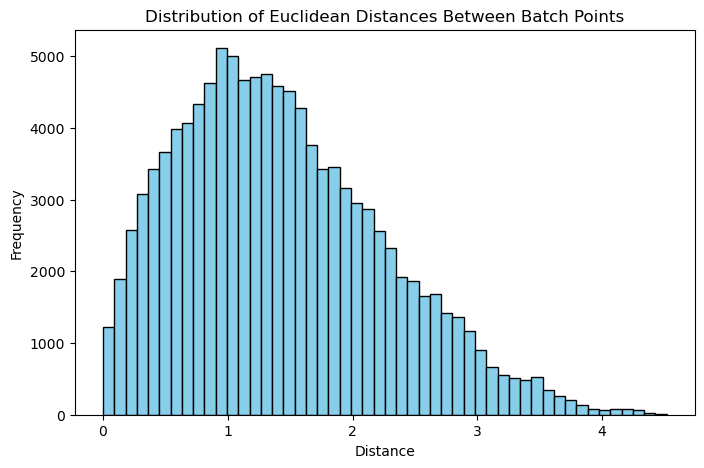

Number of distances < 0.001: 14 (out of 111048)
Proportion of distances < 0.001: 0.0001260716086737267
(Approximated) number of such point per batch of 4096: 0.5163893091275845


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils  # assuming your dataloader_emb is here

# Load dictionary and data
epochs = 3
dictionary = pd.read_csv("embeddings_data_and_dictionaries/Embeddings/Bioclip_encoder/bioclip_data_dictionary_all_taxons")
data_path = "embeddings_data_and_dictionaries/Embeddings/swiss_bioclip_embeddings/swiss_data_bioclip.h5"
dataloader, test_dataloader = utils.dataloader_emb(
    data_path,
    batch_size=2,
    shuffle=True,
    train_ratio=0.8,
    sort_duplicates=False,
    dictionary=dictionary
)

distance_list = []

# Loop over epochs and batches
for ep in range(epochs):
    pbar = tqdm(dataloader, desc=f"Epoch {ep+1}/{epochs}")
    for i, (images, coords, idx) in enumerate(pbar):
        # Convert coords to numpy
        coords = coords.numpy()  # shape: [batch_size, coord_dim]
        
        # Since batch_size=2, compute distance between the two points
        if coords.shape[0] == 2:
            dist = np.linalg.norm(coords[0] - coords[1])  # Euclidean distance
            distance_list.append(dist)

# Plot distribution of distances
plt.figure(figsize=(8,5))
plt.hist(distance_list, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Euclidean Distances Between Batch Points")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

epsilon = 0.001  # set your threshold here

# Convert distance list to a NumPy array for easy comparison
distances = np.array(distance_list)

# Count how many distances are below epsilon
num_close_points = np.sum(distances < epsilon)

print(f"Number of distances < {epsilon}: {num_close_points} (out of {len(distance_list)})")
print(f"Proportion of distances < {epsilon}: {num_close_points / len(distance_list) }")
print(f"(Approximated) number of such point per batch of 4096: {num_close_points / len(distance_list)*4096}")



Whole Dataset:
    Number of distances < 0.01: 45 (out of 1266822)         (0.01 is abt 1km I think)
    Proportion of distances < 0.01: 3.5521959675471375e-05
    (Approximated) number of such point per batch of 4096: 0.14549794683073075

Switzerland only (3ep):
    Number of distances < 0.01: 102 (out of 111048)
    Proportion of distances < 0.01: 0.0009185217203371515
    (Approximated) number of such point per batch of 4096: 3.7622649665009726


    Number of distances < 0.005: 63 (out of 111048)           (500m) 
    Proportion of distances < 0.005: 0.0005673222390317701
    (Approximated) number of such point per batch of 4096: 2.32375189107413

    Number of distances < 0.001: 14 (out of 111048)          (100m)
    Proportion of distances < 0.001: 0.0001260716086737267
    (Approximated) number of such point per batch of 4096: 0.5163893091275845

    Number of distances < 1e-07: 1 (out of 111048) (duplicates, sanity check)


In [2]:
import pandas as pd
df = pd.read_csv("results_geoplant.csv")

# Select only the columns we want: pos_encoder and any column containing 'emb_'
columns_to_keep = ['pos_encoder'] + [col for col in df.columns if 'emb_' in col]
df_selected = df[columns_to_keep]

# Round numeric columns to 4 decimal places
df_selected.iloc[:, 1:] = df_selected.iloc[:, 1:].round(4)

# Print a readable table
print(df_selected.to_string(index=False))

            pos_encoder  auc_emb_PR  auc_emb_MLP
             classifier      0.7459       0.7394
        geoclip_pos_enc      0.7592       0.7064
             difference      0.7570       0.7177
geoclip_paper_untrained      0.7048       0.6910
  geoclip_paper_trained      0.7356       0.7104
            species_emb      0.7549       0.7061
    correct_frequencies      0.7509       0.7481
         actual_geoclip      0.7279       0.7140
        drop_high_sigma      0.7695       0.7494
